In [1]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

In [2]:
class BatsMan(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percent: float
    summary: str

In [7]:
def strike_rate(state:BatsMan):
    sr = round(state["runs"]/state["balls"],2)*100
    return {"sr":sr}

In [19]:
def cal_bpb(state:BatsMan):

    bpb = round(state["balls"]/(state["fours"] + state["sixes"]),2)
    return {"bpb":bpb}

In [33]:
def boundary_per(state:BatsMan):

    bp = (state["fours"]*4 + state["sixes"]*6)/state["runs"]*100
    return {"boundary_percent":bp}

In [37]:
def summary_gen(state:BatsMan):

    summary = f"strike_rate: {state["sr"]}\n bpb: {state["bpb"]}\n boundary_percentage: {state["boundary_percent"]}"
    return {"summary":summary}

In [39]:
graph = StateGraph(BatsMan)

graph.add_node("sr",strike_rate)
graph.add_node("bpb",cal_bpb)
graph.add_node("bp",boundary_per)
graph.add_node("summary",summary_gen)

graph.add_edge(START,"sr")
graph.add_edge(START,"bpb")
graph.add_edge(START,"bp")


graph.add_edge("sr","summary")
graph.add_edge("bpb","summary")
graph.add_edge("bp","summary")
graph.add_edge("summary",END)

workflow = graph.compile()

In [43]:
intial_sate = {"runs":100,"balls":50,"fours":10,"sixes":5}
final_state = workflow.invoke(intial_sate)
print(final_state)

print(final_state["summary"])

{'runs': 100, 'balls': 50, 'fours': 10, 'sixes': 5, 'sr': 200.0, 'bpb': 3.33, 'boundary_percent': 70.0, 'summary': 'strike_rate: 200.0\n bpb: 3.33\n boundary_percentage: 70.0'}
strike_rate: 200.0
 bpb: 3.33
 boundary_percentage: 70.0


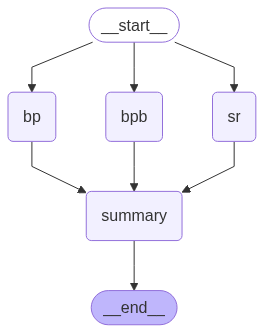

In [41]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())